In [1]:
%cd ..
import layers
from utils import *
from tqdm import tqdm

C:\Users\bgre4\AppData\Local\JetBrains\PyCharm2023.2\demo\PyCharmLearningProject\venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\bgre4\smallworld_snn


## Инициализируем топологию
Параметры можно изменять в `topology_params`

In [2]:
topology_params = {'amount_neurons': 10, 'k_neighbours': 3,
                   'probability': 0.6, 'dtau': 0.01}

hidden_layer = layers.IntraConnectLayer(**topology_params)
hidden_layer.from_edges()

Количество двойных связей:  0.0


## Информация о топологии
У класса `IntraConnectLayer` есть 2 метода с помощью которых можно узнать как выглядит топология.

1) `IntraConnectLayer.draw_graph()` - граф связности (ничего не видно при количестве нейронов > 100). Параметры отрисовки можно изменить в родительском классе `HiddenLayer`
2) `IntraConnectLayer.get_connevtivity` - возвращает `pd.DataFrame` с информацией о связности нейронов (по факту - матрица весов)

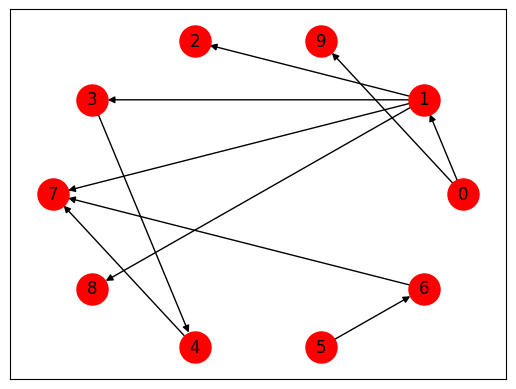

In [3]:
hidden_layer.draw_graph()

In [4]:
hidden_layer.get_connectivity()

,0,1,2,3,4,5,6,7,8,9
0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0
1,0.0,0.0,250.0,250.0,0.0,0.0,0.0,250.0,250.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Создаем серию входных спайков
Доступно несколько видов входных серий, выбрать другие можно изменив значение `'version'` в `generator_params`

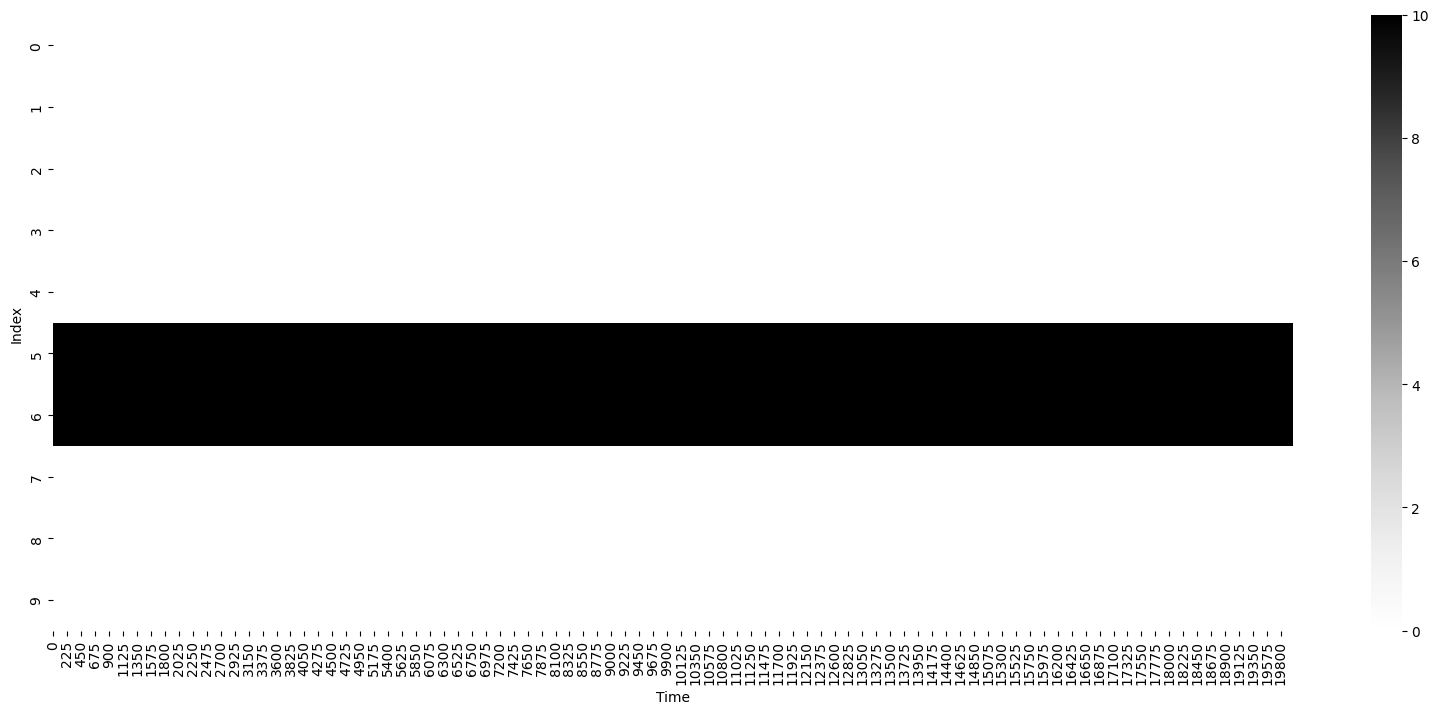

In [5]:
generator_params = {'steps': 20000, 'version': '2'}

input_spikes = spike_generator(n=topology_params.get('amount_neurons'), **generator_params)
plot_inputs(input_spikes)

## Проход по сети

In [6]:
out, mem, tau_max, syn_matrix = hidden_layer.intra_forward(input_spikes)
df = pd.DataFrame(np.concatenate((input_spikes, mem, out), axis=1))

11772 10338
18870 17437
['Coef: 5.822314404469992, Index: (6, 7)', 'Coef: 10.0, Index: (5, 6)']


C:\Users\bgre4\smallworld_snn\utils.py:299: RuntimeWarning: divide by zero encountered in log
  calculation = (- 0.5 * np.log(((t_1 - t_2) * dt) / (tau_max - ((t_1 - t_2) * dt)))) * sigma_max / 3.57


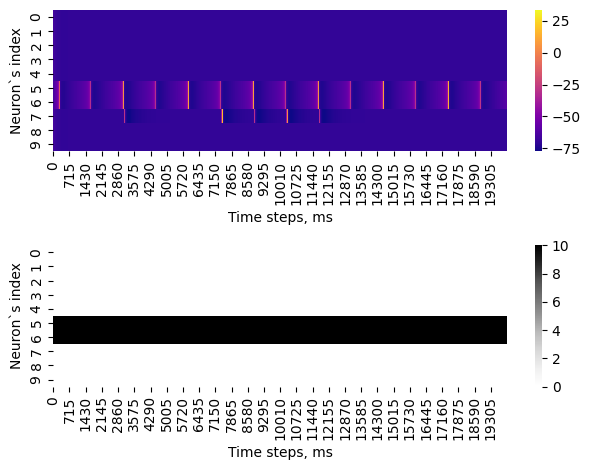

In [7]:
plot_heatmap_2_0(mem, input_spikes)

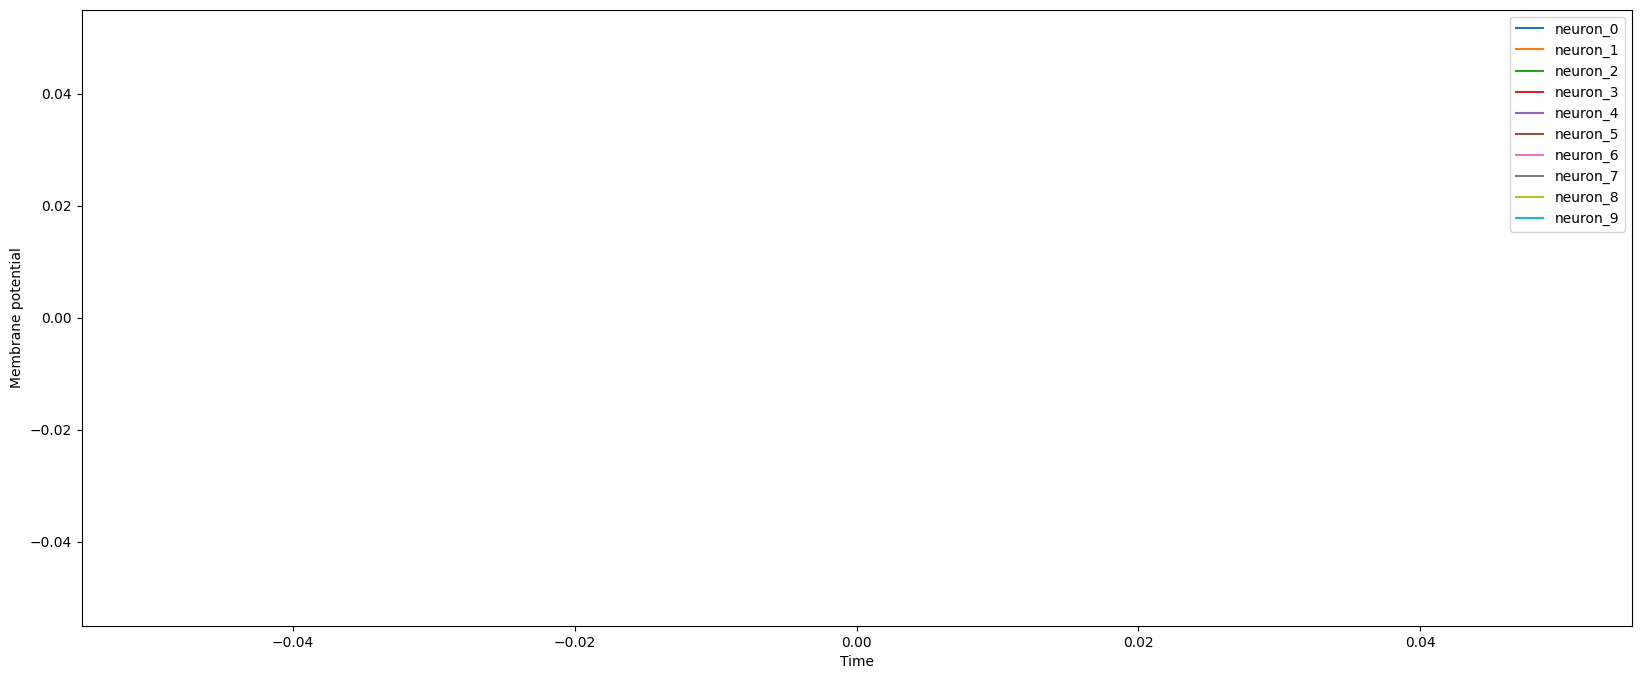

In [11]:
plot_mem(df)